In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
toy_data = pd.read_csv("/content/drive/MyDrive/Project/eda_toy1.csv")

In [ ]:
toy_data.head(2)

,Unnamed: 0,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,0,A1VXOAVRGKGEAK,0439893577,Angie,like item pricing granddaughter wanted mark wa...,5,Magnetic board,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.000000,Neutral
1,1,A8R62G708TSCM,0439893577,Candace,love magnet easel great moving different areas...,4,it works pretty good for moving to different a...,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.433333,Positive


In [ ]:
toy_data.describe()['overall'].T

count    166759.000000
mean          4.355363
std           0.994079
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [ ]:
print('Minimum rating is: %d' %(toy_data.overall.min()))
print('Maximum rating is: %d' %(toy_data.overall.max()))

Minimum rating is: 1
Maximum rating is: 5


The rating of the product range from 0 to 5.

1 - bad rating

5 - good rating

In [ ]:
#Check for missing values
print('Number of missing values across columns: \n',toy_data.isnull().sum())

Number of missing values across columns: 
 Unnamed: 0               0
reviewerID               0
asin                     0
reviewerName            12
reviewText              93
overall                  0
summary                  0
reviewTime               0
Reviews_orignal         93
reviewText + summary     0
reviewPolarity           0
reviewAnalysis           0
dtype: int64


In [ ]:
toy_data.dropna(inplace = True)
toy_data.reset_index(inplace=True)

In [ ]:
toy_data.drop(columns=["index","Unnamed: 0"],inplace=True,axis=1)

In [ ]:
toy_data.head(2)

,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,A1VXOAVRGKGEAK,0439893577,Angie,like item pricing granddaughter wanted mark wa...,5,Magnetic board,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.000000,Neutral
1,A8R62G708TSCM,0439893577,Candace,love magnet easel great moving different areas...,4,it works pretty good for moving to different a...,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.433333,Positive


In [ ]:
toy_data_rec = toy_data[["reviewerID","asin","overall","Reviews_orignal"]]

#### 0

In [ ]:
toy_data_rec.head(2)

,reviewerID,asin,overall,Reviews_orignal
0,A1VXOAVRGKGEAK,0439893577,5,I like the item pricing. My granddaughter want...
1,A8R62G708TSCM,0439893577,4,Love the magnet easel... great for moving to d...


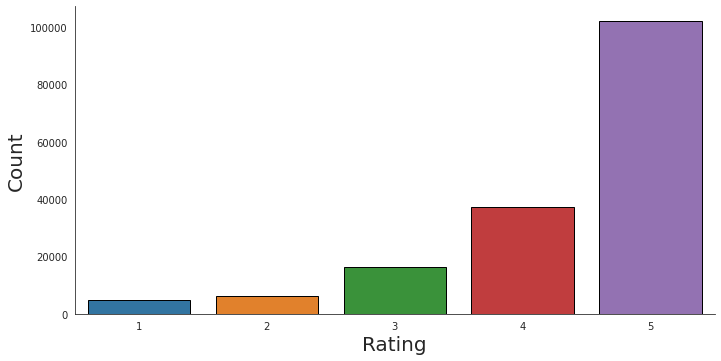

In [ ]:
import warnings
warnings.filterwarnings('ignore')

with sns.axes_style('white'):
    g = sns.factorplot("overall", data=toy_data_rec, aspect=2.0,kind='count',edgecolor="black")
    g.set_ylabels("Count",size=20)
    g.set_xlabels("Rating",size=20)

Most of the people has given the rating of 5

In [ ]:
print("\nTotal no of ratings :",toy_data_rec.shape[0])
print("Total No of Users   :", len(np.unique(toy_data_rec.reviewerID)))
print("Total No of products  :", len(np.unique(toy_data_rec.asin)))


Total no of ratings : 166654
Total No of Users   : 19398
Total No of products  : 11924


In [ ]:
# product_rating count 
product_rating_count = toy_data_rec.groupby(by='asin')['overall'].count().sort_values(ascending=False)
product_rating_count.head()

asin
B0089RPUHO    253
B0039S7NO6    215
B001W30D2O    207
B004S8F7QM    204
B002NPBT50    196
Name: overall, dtype: int64

In [ ]:
no_of_rated_products_per_user = toy_data_rec.groupby(by='reviewerID')['overall'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

reviewerID
AJGU56YG8G1DQ     548
A1M8AYAL3L8ACP    167
A1II2ZRPKZAQQD    154
A2WW57XX2UVLM6    151
A1POFVVXUZR3IQ    132
Name: overall, dtype: int64

In [ ]:
no_of_rated_products_per_user.describe()

count    19398.000000
mean         8.591298
std          8.487893
min          1.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        548.000000
Name: overall, dtype: float64

####Content Based Recommendation System

Recommendation system based on the product's reviews given in the review column. So if customers gives us a product name, our goal is to recommend products that are similar reviews.

In [ ]:
toy_data_rec.rename({"reviewerID":"Customer_ID","asin":"Product_ID","overall":"Rating","Reviews_orignal":"Reviews"},inplace=True,axis=1)

In [ ]:
toy_data_rec.head(1)

,Customer_ID,Product_ID,Rating,Reviews
0,A1VXOAVRGKGEAK,0439893577,5,I like the item pricing. My granddaughter want...


In [ ]:
toy_data_rec.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,166654.0,4.355461,0.99393,1.0,4.0,5.0,5.0,5.0


In [ ]:
average_rating = pd.DataFrame(toy_data_rec.groupby('Product_ID')['Rating'].mean())
average_rating['Rating_Count'] = pd.DataFrame(toy_data_rec.groupby('Product_ID')['Rating'].count())
average_rating.sort_values('Rating_Count', ascending=False).head()

,Rating,Rating_Count
Product_ID,,
B0089RPUHO,4.600791,253
B0039S7NO6,4.716279,215
B001W30D2O,4.589372,207
B004S8F7QM,4.852941,204
B002NPBT50,4.566327,196


#### Finding Meaningful ratings --- 

Suppose one for one product we have one highest rating i.e. one person give one rating only. So, that is not meaningful in this case.

In [ ]:
average_rating.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,11924.0,4.349735,0.528172,1.0,4.103096,4.466667,4.727273,5.0
Rating_Count,11924.0,13.976350,15.648908,1.0,6.000000,9.000000,15.000000,253.0


In [ ]:
average_rating.shape

(11924, 2)

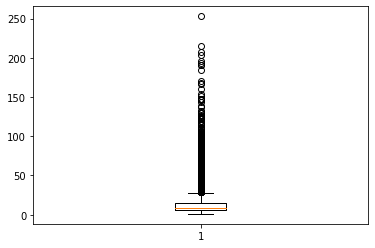

In [ ]:
plt.boxplot(average_rating["Rating_Count"])
plt.show()

In [ ]:
average_rating1 =average_rating[(average_rating["Rating_Count"]>=7) & (average_rating["Rating_Count"]<=22)]

In [ ]:
average_rating1.shape

(6217, 2)

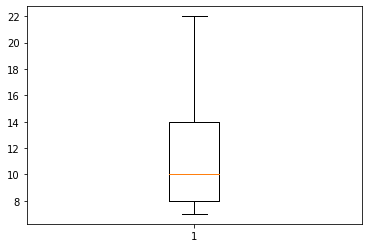

In [ ]:
plt.boxplot(average_rating1["Rating_Count"])
plt.show()

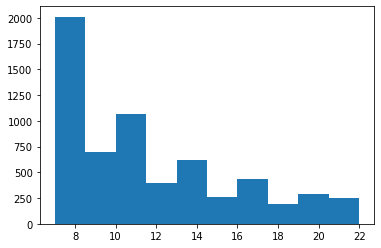

In [ ]:
plt.hist(average_rating1["Rating_Count"])
plt.show()

#### To ensure statistical significance, users with less than 7 ratings, and products with gretter than 22 ratings are excluded.

In [ ]:
counts1 = toy_data_rec['Customer_ID'].value_counts()
ratings = toy_data_rec[toy_data_rec['Customer_ID'].isin(counts1[counts1 >= 7].index)]
counts = toy_data_rec['Rating'].value_counts()
ratings = toy_data_rec[toy_data_rec['Rating'].isin(counts[counts >= 22].index)]

#### Rating matrix

We convert the ratings table to a 2D matrix. The matrix will be sparse because not every Customer rated every Product.

In [ ]:
ratings_pivot = toy_data_rec.pivot(index='Customer_ID', columns='Product_ID').Rating
Customer_ids = toy_data_rec.index
Product_ids = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(19398, 11924)


Product_ID,0439893577,048645195X,0545496470,0615444172,0670010936,0735308365,0735321396,073533305X,0735333483,073533417X,...,B00J49UTWC,B00J5KVSWK,B00J7PI4MU,B00JRCB3HQ,B00JV9D9M2,B00JV9HDP6,B00K18YIOU,B00KYMCJF8,B00KZAROWC,B00LBI9BKA
Customer_ID,,,,,,,,,,,,,,,,,,,,,
A012468118FTQAINEI0OQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0182108CPDLPRCXQUZQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A026961431MGW0616BRS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A034597326Z83X79S50FI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A04295422T2ZG087R17FX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
toy_data_rec["Product_ID"].mode()

0    B0089RPUHO
dtype: object

Finding pearson corelation for a particular product

In [ ]:
from IPython.display import display
def recommended_products(Product_id):
  bones_ratings = ratings_pivot[str(Product_id)]
  similar_to_bones = ratings_pivot.corrwith(bones_ratings)
  corr_bones = pd.DataFrame(similar_to_bones, columns=['pearson_corr'])
  corr_bones.dropna(inplace=True)
  corr_summary = corr_bones.join(average_rating['Rating_Count'])
  #print(corr_summary['Rating_Count'].max())
  return corr_summary[corr_summary['Rating_Count']>=int(corr_summary['Rating_Count'].max()//3)].
  sort_values('pearson_corr', ascending=False).head(5)

In [ ]:
toy_data_rec['Product_ID'].mode()[0]

'B0089RPUHO'

In [ ]:
recommended_products(toy_data_rec['Product_ID'].mode()[0])

,pearson_corr,Rating_Count
Product_ID,,
B0089RPUHO,1.0,253
B001W30D2O,1.0,207
B0006N8X3M,1.0,93
B000VO3GPG,1.0,94
B000LSZVJQ,1.0,97


In [ ]:
recommended_product = recommended_products(toy_data_rec['Product_ID'].mode()[0]).index

In [ ]:
print("Recomendated products for",toy_data_rec['Product_ID'].mode()[0]," product id is \n:",recommended_product)

Recomendated products for B0089RPUHO  product id is 
: Index(['B0089RPUHO', 'B001W30D2O', 'B0006N8X3M', 'B000VO3GPG', 'B000LSZVJQ'], dtype='object', name='Product_ID')


In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg") # Downloading english spacy which has 514k keys, 514k unique vectors (300 dimensions)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


PERSON:      People, including fictional.

NORP:        Nationalities or religious or political groups.

FAC:         Buildings, airports, highways, bridges, etc.

ORG:         Companies, agencies, institutions, etc.

GPE:         Countries, cities, states.

LOC:         Non-GPE locations, mountain ranges, bodies of water.

PRODUCT:     Objects, vehicles, foods, etc. (Not services.)

EVENT:       Named hurricanes, battles, wars, sports events, etc.

WORK_OF_ART: Titles of books, songs, etc.

LAW:         Named documents made into laws.

LANGUAGE:    Any named language.

DATE:        Absolute or relative dates or periods.

TIME:        Times smaller than a day.

PERCENT:     Percentage, including ”%“.

MONEY:       Monetary values, including unit.

QUANTITY:    Measurements, as of weight or distance.

ORDINAL:     “first”, “second”, etc.

CARDINAL:    Numerals that do not fall under another type.

In [ ]:
from collections import Counter 
nlp= spacy.load('en_core_web_lg')  
def find(product_id):
  l = toy_data_rec[(toy_data_rec["Product_ID"]==product_id)]

  product_names = []
  reviews = []
  c=1
  for j in l.Reviews.unique():
      reviews.append(j)
      product=[]
      count=[]
      d=l[l['Reviews']==j]['Reviews']
      for i in d :
          dat= nlp(i)
          for w in dat.ents:
              if w.label_=='PRODUCT':
                count.append(w.text)
                      
      if count==[]:
        pass
      else:
        a=Counter(count).most_common(1)[:1][0][0]
        product_names.append(a)
      
      c+=1
  return product_names

In [ ]:
find(toy_data_rec['Product_ID'].mode()[0])

['iPhone 3Gs',
 'Leap Pad',
 'Explorer',
 'Ultra',
 'Leap Frog',
 'Leap Pad',
 'a LeapPad 2',
 'Leap Pad',
 'iPod',
 'App',
 'The Gel Skin',
 'Kindle',
 'Explorers',
 'Leap Frog',
 'Ultra',
 'Ultra',
 'iPads/Kindles/Nooks',
 'Ultra',
 'Explorer',
 'the LeapPad 2',
 'Explorer',
 'Galaxy',
 'Leap Pad 2',
 'iPod Touch',
 'iPad',
 'iPad',
 'iPads',
 'Kindle Fire',
 'Ped Pad1',
 'Leap Pad 2',
 'Leap Pad 2',
 'Nintendo 3ds',
 'iPads',
 'Leap Pad 2',
 'iPad',
 'a Gel Skin Monsters U.',
 'Fire HD',
 'Leap Frog',
 'a Gel Skin',
 'LeapPAD2',
 'App',
 'Leap',
 'this Leap Pad',
 'toybox',
 'Kindle',
 'iPad',
 'iPod',
 'the Leap Pads',
 'iPad',
 'iTunes',
 'Kindle',
 'Leap']

Leap Pad

#### 1-5

In [ ]:
for i in recommended_product:
  print(i,":")
  print(find(i))

B0089RPUHO :
['2yr old', 'the Learning Path', 'Leap Pad Windows XP', 'Angry Birds', 'The Clam Prix', 'Video and Camera', 'Camera and video recorderGood', 'iPod Touch', 'An Ipad', 'The Leap Pad 2', 'Eye iPad', 'The Book of Super Awesome Stuff', 'Tune Up', '"Word Soup', 'iPhone/ Andriod', 'LeapBook', 'Thomas Ultrabook', 'Awesome', 'Leap Pad', 'Car Adapter', "the Leap Pad 2's", 'Big Monster on Campus', 'Love', 'The Tunables']
B001W30D2O :
['Car, Crib', 'me.&#34', 'Learning Puppy', 'Twinkle Twinkle Little Star', 'the My Pal Violets/Scouts', 'Love']
B0006N8X3M :
['Love', 'Kroger Card', 'CB Open']
B000VO3GPG :
['Baby Stella']
B000LSZVJQ :
[]


In [ ]:
print("Recomendated products for : |Leap Pad| is :\n","Angry Birds,Learning Puppy,CB Open,Baby Stella")

Recomendated products for : |Leap Pad| is :
 Angry Birds,Learning Puppy,CB Open,Baby Stella
